In [1]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn import metrics
# Evaluation metrics related methods
from sklearn.metrics import classification_report, accuracy_score, f1_score, confusion_matrix, precision_recall_fscore_support, precision_score, recall_score

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
dataset_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML241EN-SkillsNetwork/labs/datasets/tumor.csv"
tumor_df = pd.read_csv(dataset_url)
# tumor_df.to_csv("tumor.csv", index=False)

In [3]:
tumor_df.head()

,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,5,1,1,1,2,1,3,1,1,0
1,5,4,4,5,7,10,3,2,1,0
2,3,1,1,1,2,2,3,1,1,0
3,6,8,8,1,3,4,3,7,1,0
4,4,1,1,3,2,1,3,1,1,0


In [5]:
tumor_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Clump        683 non-null    int64
 1   UnifSize     683 non-null    int64
 2   UnifShape    683 non-null    int64
 3   MargAdh      683 non-null    int64
 4   SingEpiSize  683 non-null    int64
 5   BareNuc      683 non-null    int64
 6   BlandChrom   683 non-null    int64
 7   NormNucl     683 non-null    int64
 8   Mit          683 non-null    int64
 9   Class        683 non-null    int64
dtypes: int64(10)
memory usage: 53.5 KB


In [6]:
X = tumor_df.iloc[:, :-1]
y = tumor_df.iloc[:, -1:]

In [7]:
X.describe()

,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit
count,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,4.442167,3.150805,3.215227,2.830161,3.234261,3.544656,3.445095,2.869693,1.603221
std,2.820761,3.065145,2.988581,2.864562,2.223085,3.643857,2.449697,3.052666,1.732674
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [9]:
rs = 123
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state = rs)
model = DecisionTreeClassifier(random_state=rs)

In [10]:
model.fit(X_train, y_train.values.ravel())
preds = model.predict(X_test)

In [12]:
def evaluate_metrics(yt, yp):
    results_pos = {}
    results_pos['accuracy'] = accuracy_score(yt, yp)
    precision, recall, f_beta, _ = precision_recall_fscore_support(yt, yp, average='binary')
    results_pos['recall'] = recall
    results_pos['precision'] = precision
    results_pos['f1score'] = f_beta
    return pd.DataFrame(results_pos, index=[0])

In [13]:
evaluate_metrics(y_test, preds)

,accuracy,recall,precision,f1score
0,0.956204,0.958333,0.92,0.938776


In [14]:
def plot_decision_tree(model, feature_names):
    plt.subplots(figsize=(25, 20)) 
    tree.plot_tree(model, 
                       feature_names=feature_names,  
                       filled=True)
    plt.show()

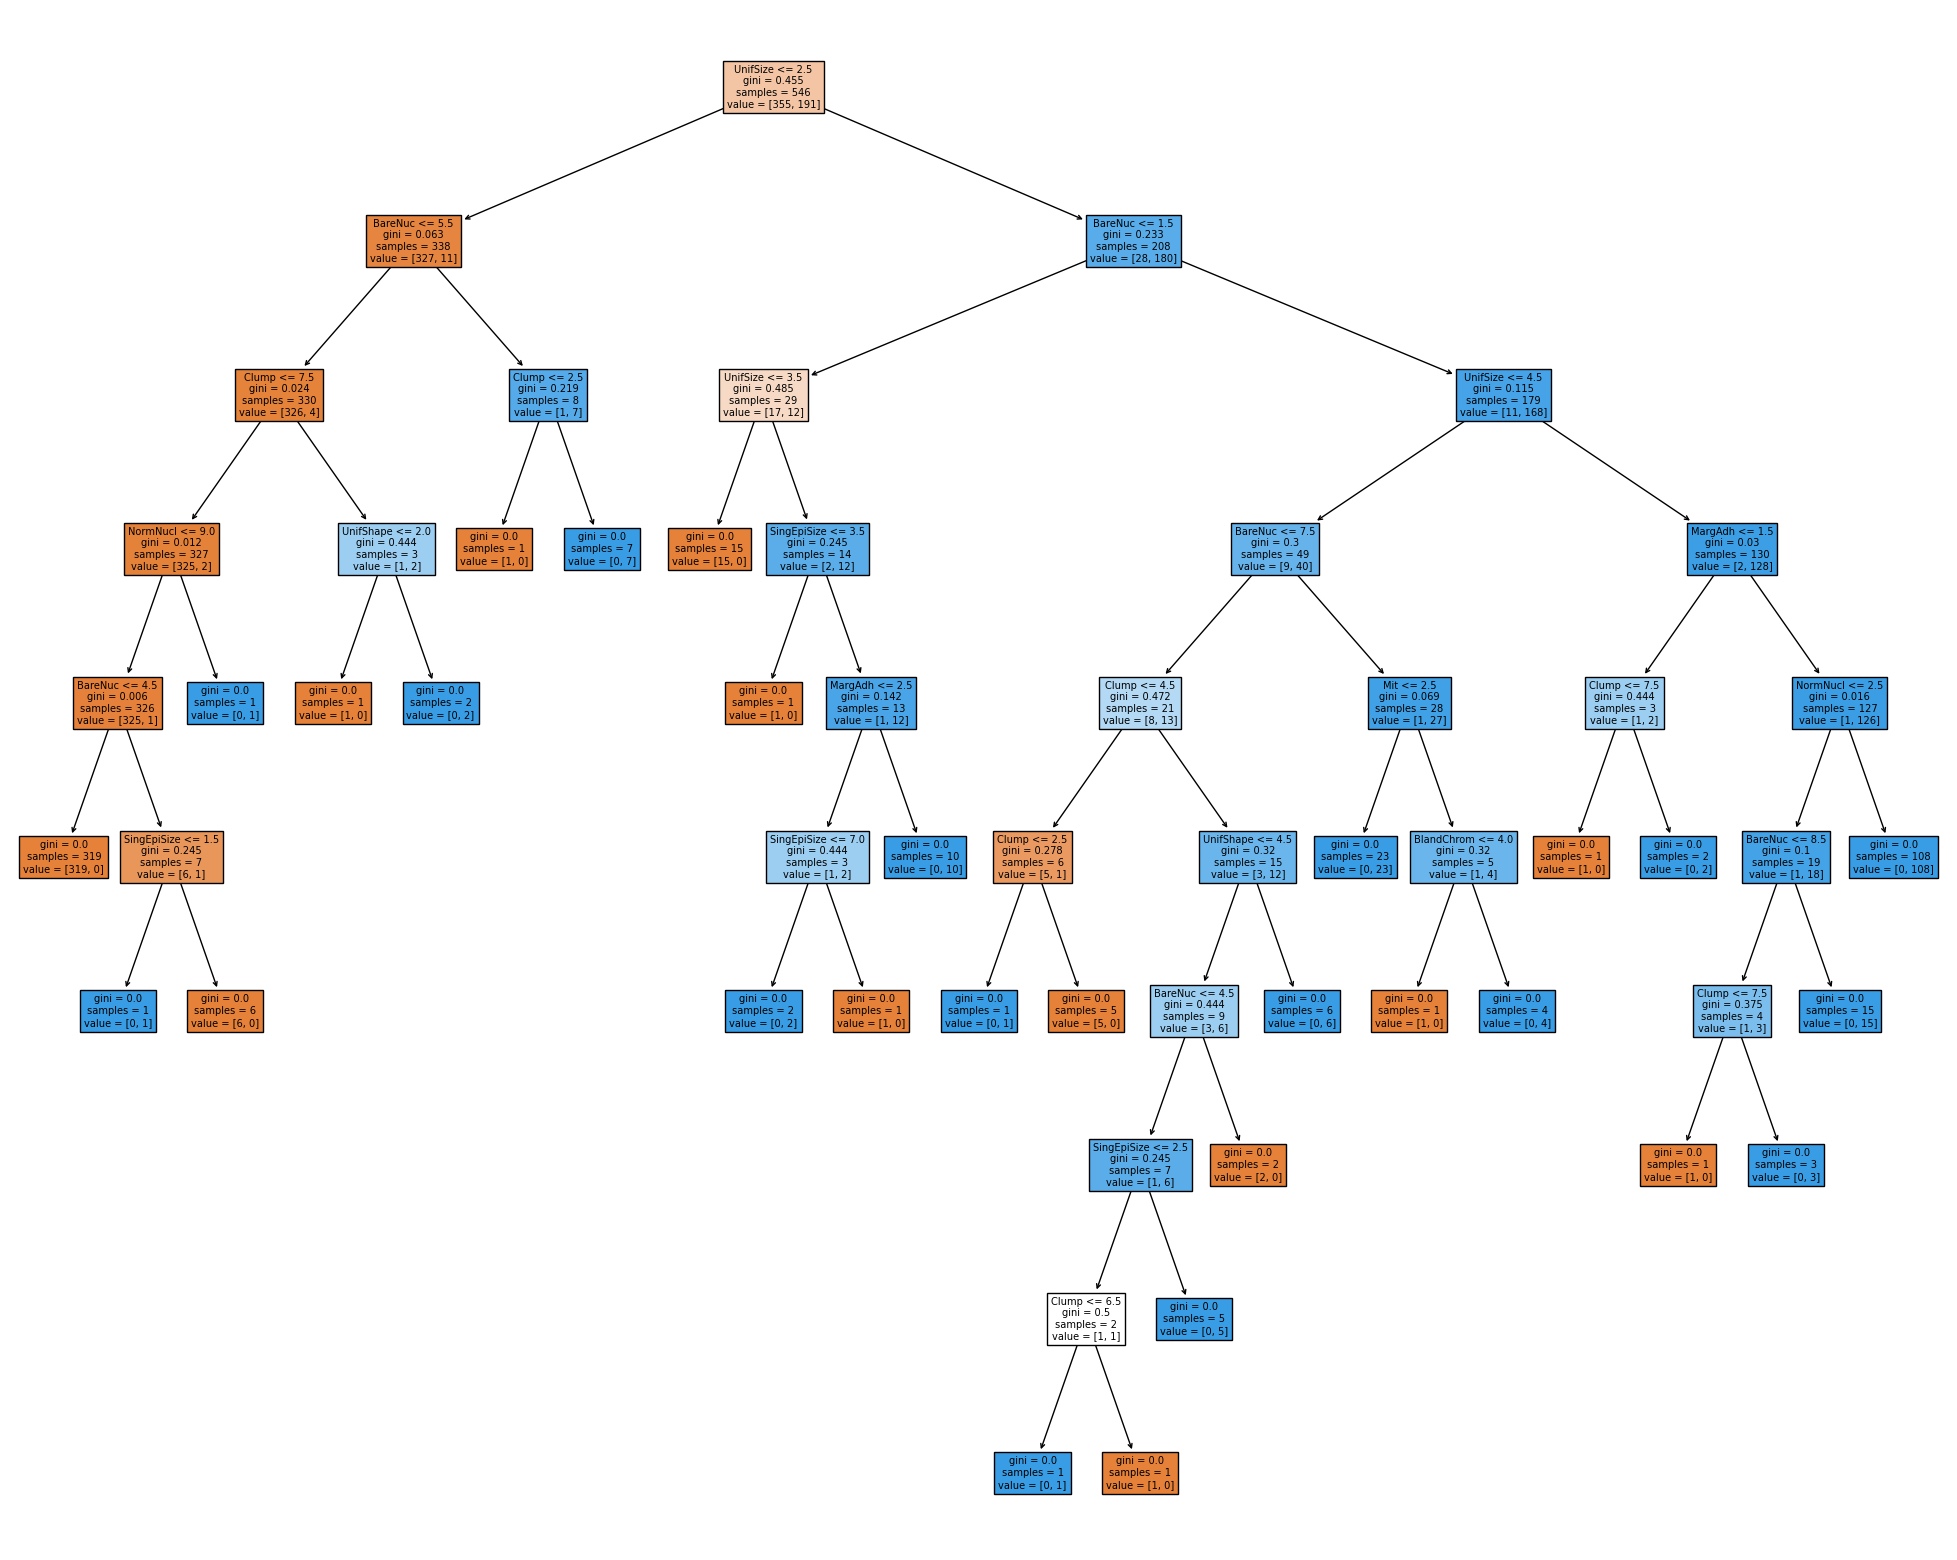

In [15]:
feature_names = X.columns.values
plot_decision_tree(model, feature_names)

In [16]:
custom_model = DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=3, random_state=rs)
custom_model.fit(X_train, y_train.values.ravel())

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=3,
                       random_state=123)

In [17]:
preds = custom_model.predict(X_test)
evaluate_metrics(y_test, preds)

,accuracy,recall,precision,f1score
0,0.963504,0.916667,0.977778,0.946237


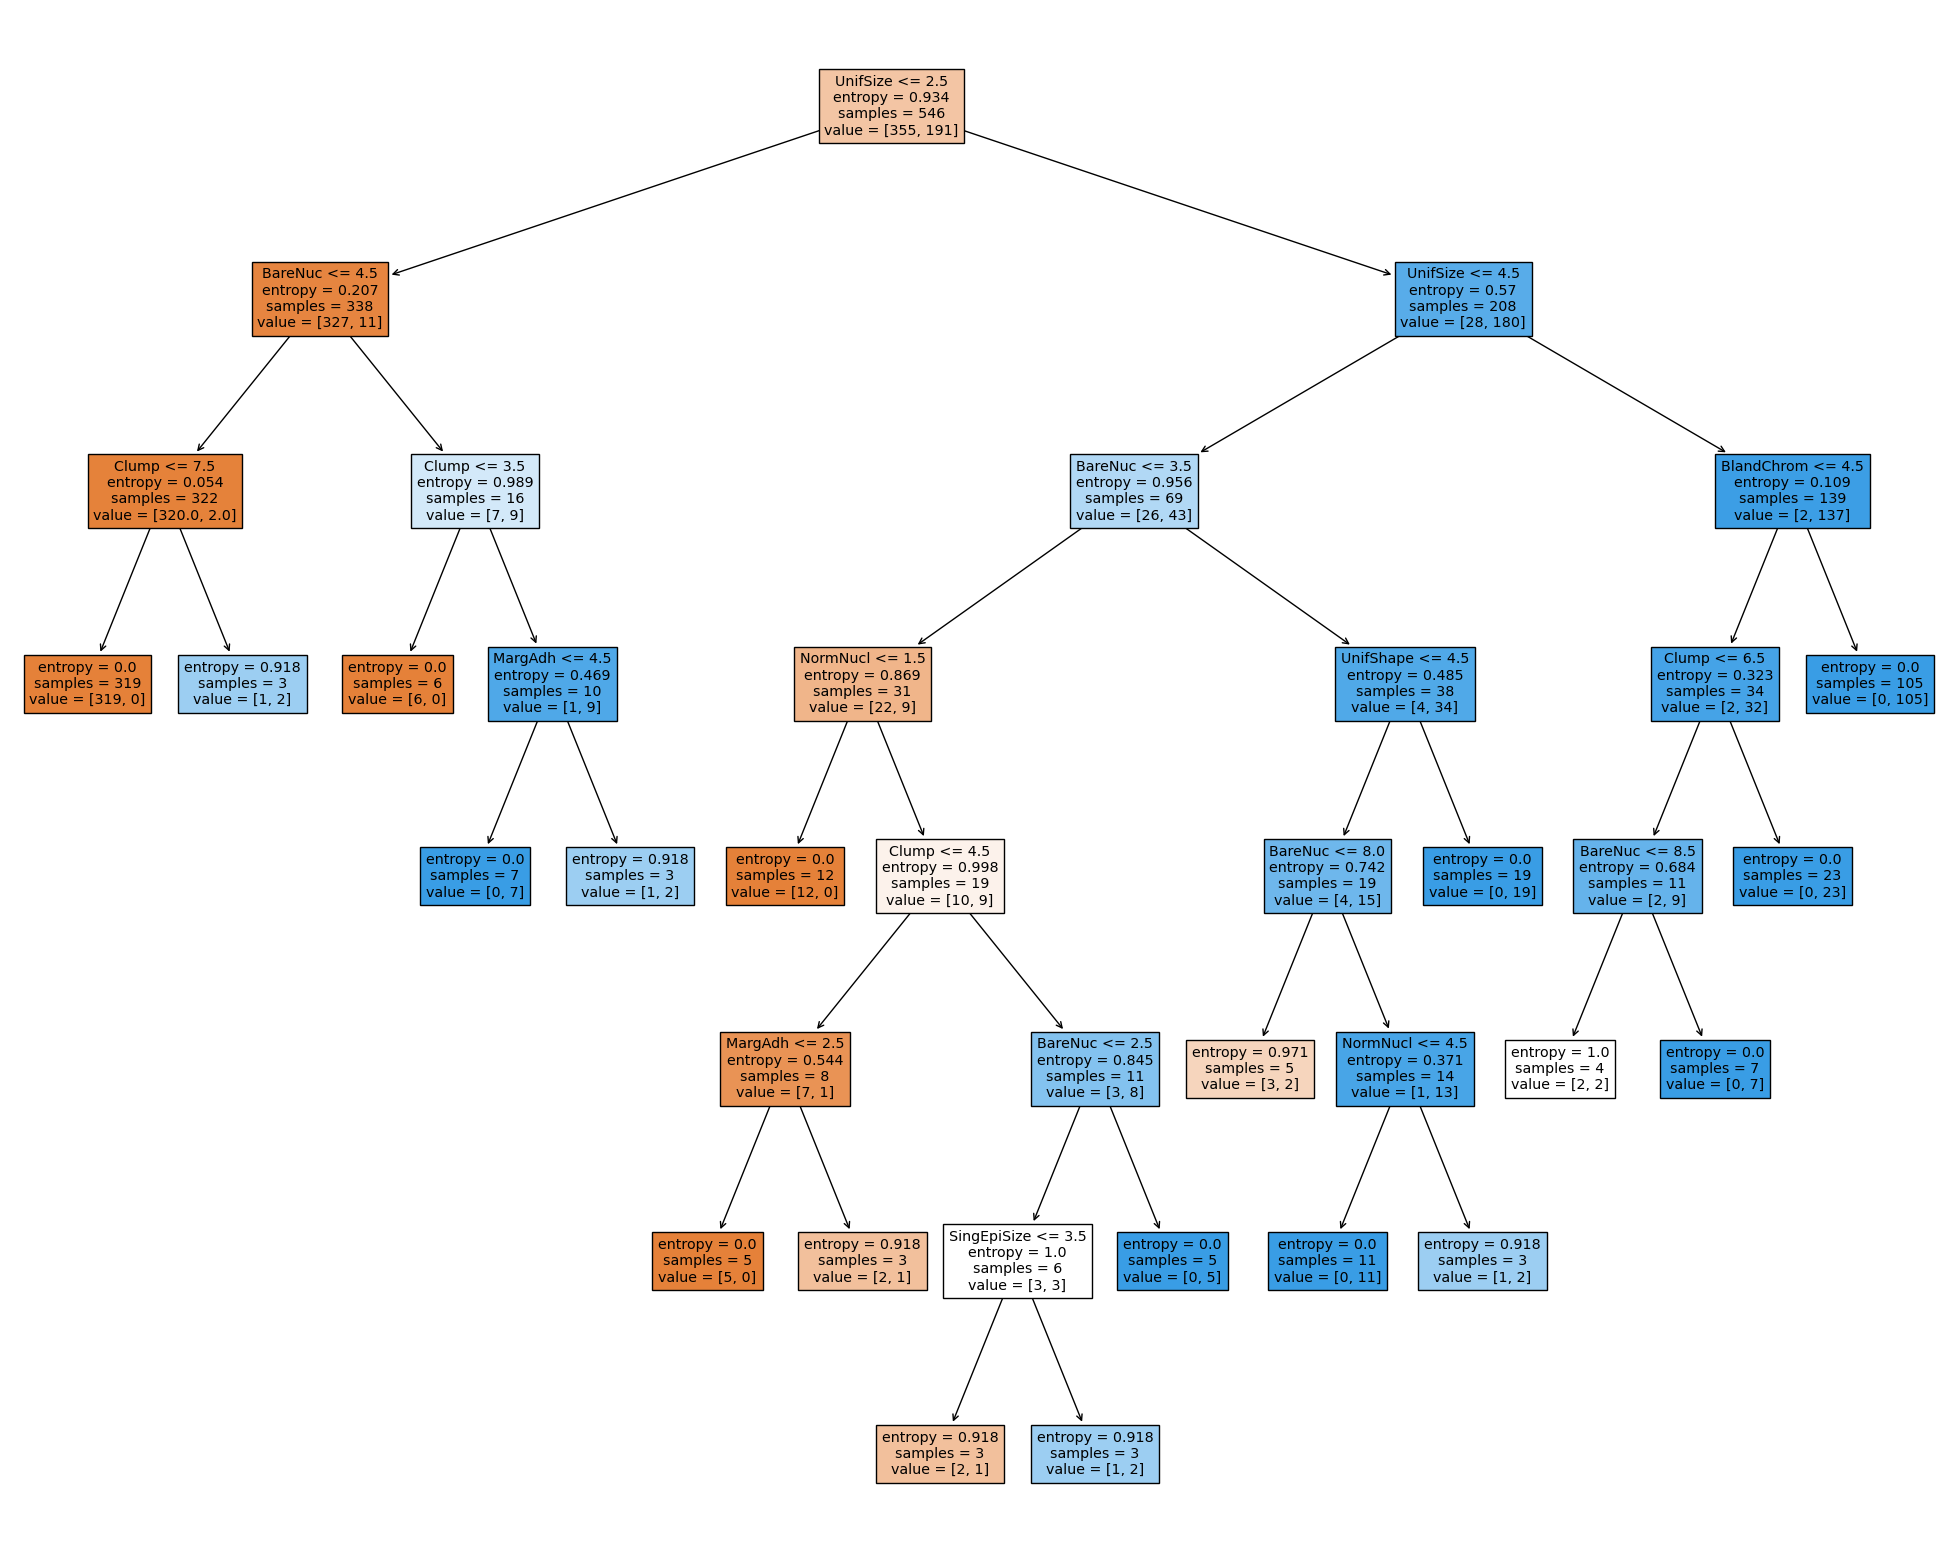

In [18]:
plot_decision_tree(custom_model, feature_names)

In [19]:
prac_model = DecisionTreeClassifier(criterion='gini', max_depth=15, min_samples_leaf=5)
prac_model.fit(X_train, y_train.values.ravel())
preds = prac_model.predict(X_test)
evaluate_metrics(y_test, preds)

,accuracy,recall,precision,f1score
0,0.970803,0.979167,0.94,0.959184


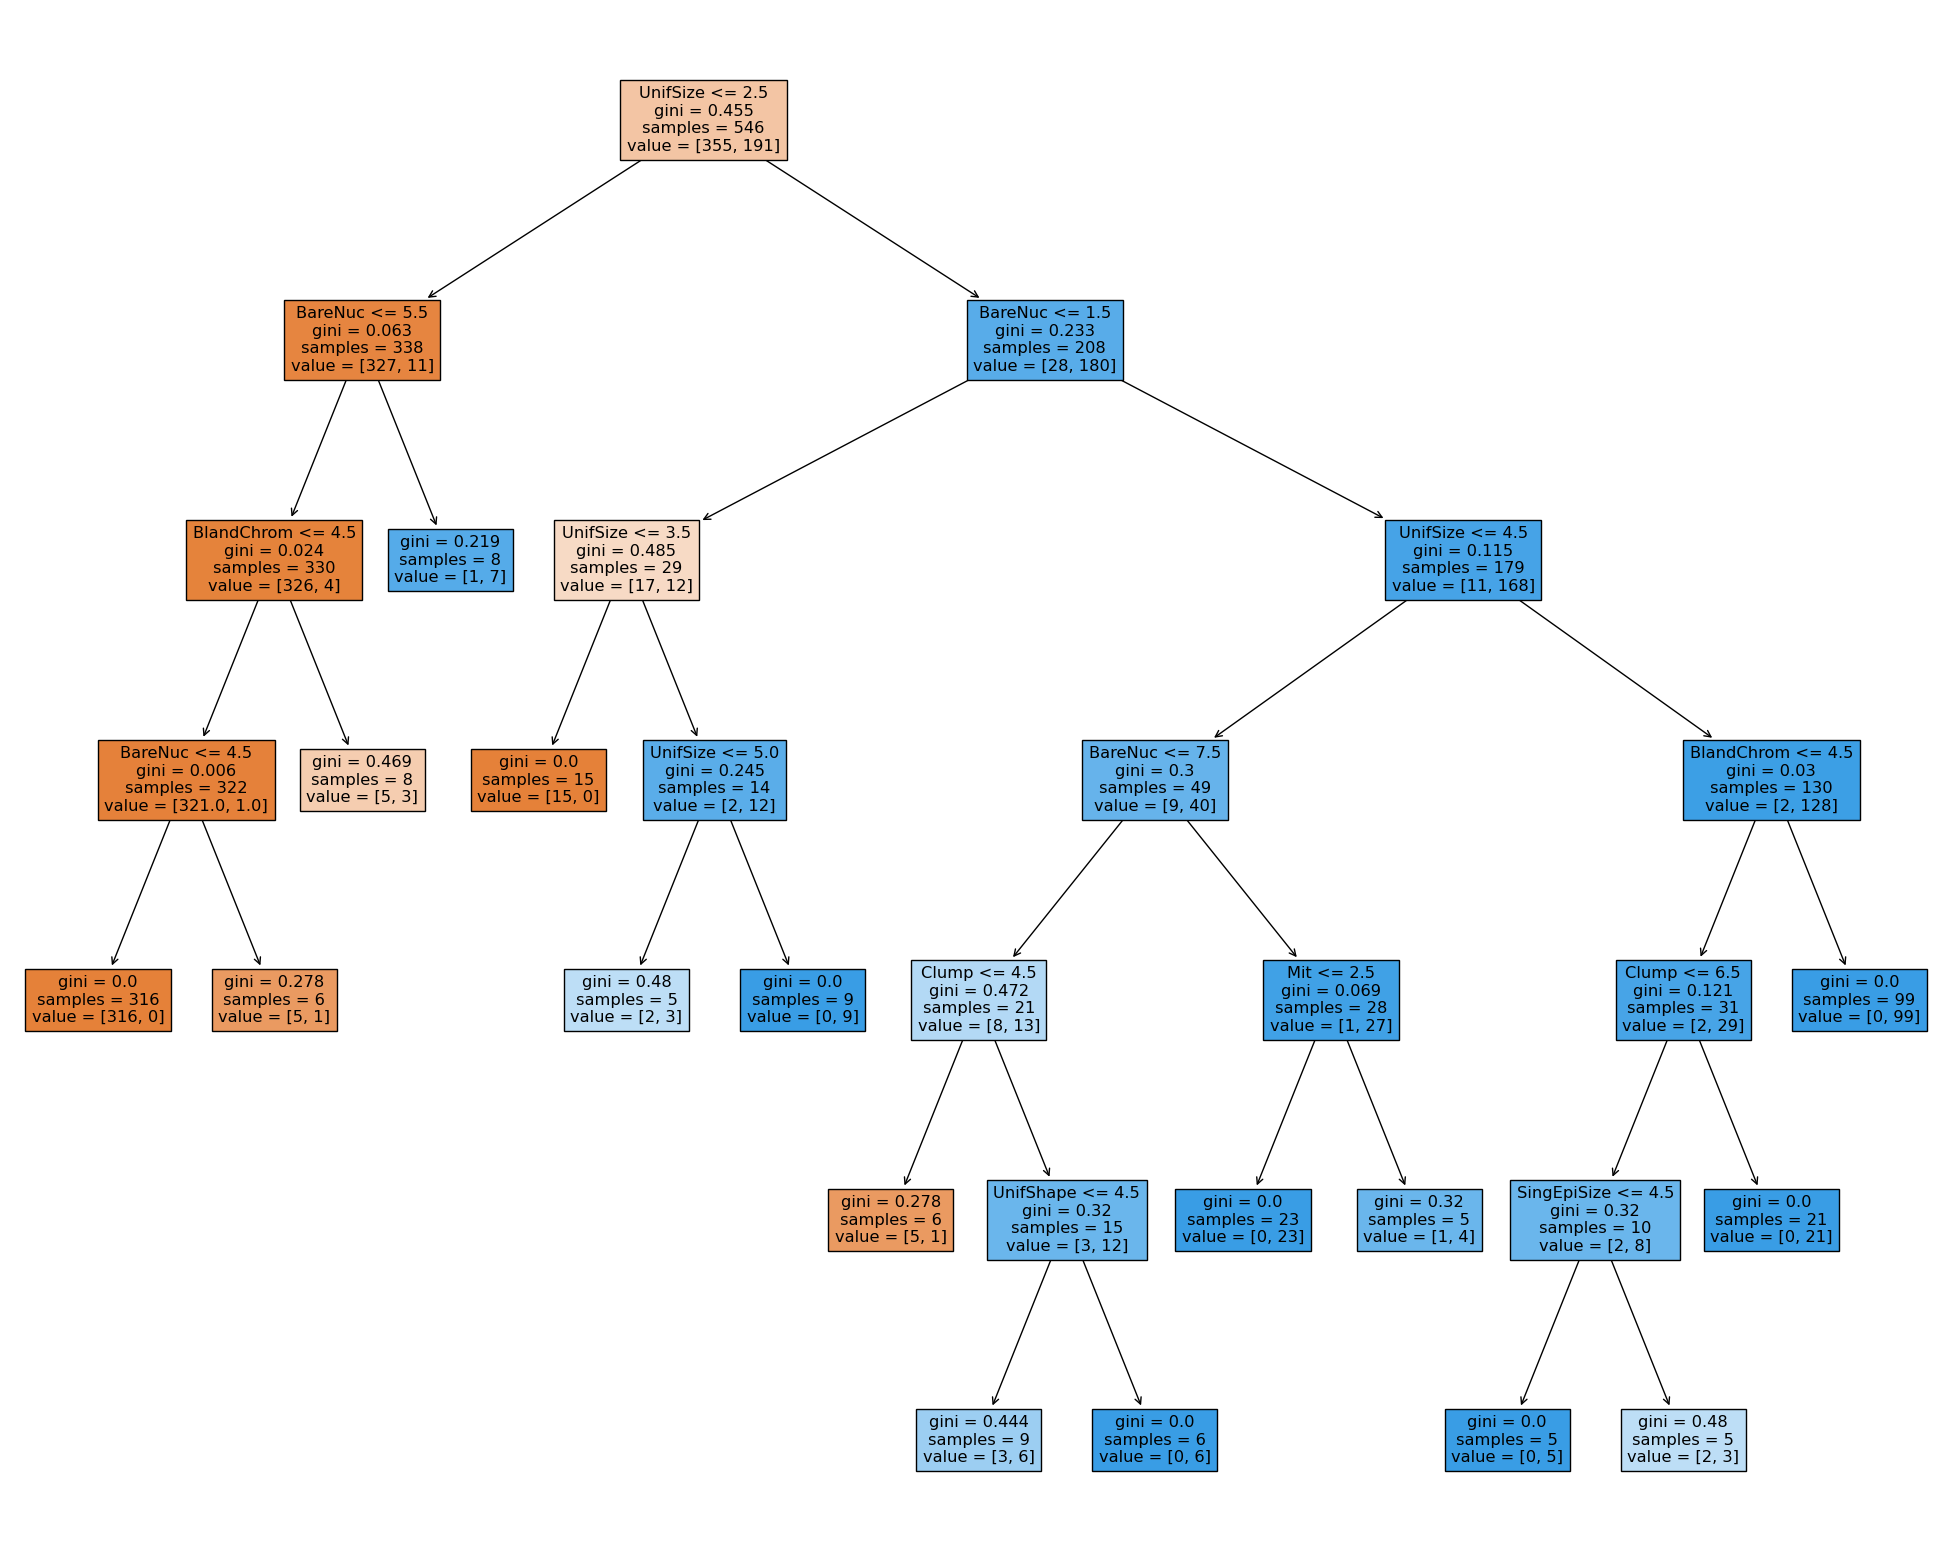

In [20]:
plot_decision_tree(prac_model, feature_names)

In [21]:
params_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 5]
}

In [22]:
model = DecisionTreeClassifier(random_state=rs)

In [23]:
grid_search = GridSearchCV(estimator = model, 
                        param_grid = params_grid, 
                        scoring='f1',
                        cv = 5, verbose = 1)
grid_search.fit(X_train, y_train.values.ravel())
best_params = grid_search.best_params_

Fitting 5 folds for each of 24 candidates, totalling 120 fits


In [24]:
best_params

{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 5}

In [25]:
custom_model = DecisionTreeClassifier(criterion= 'gini', max_depth= 10, min_samples_leaf= 5)
custom_model.fit(X_train, y_train.values.ravel())
preds = custom_model.predict(X_test)
evaluate_metrics(y_test, preds)

,accuracy,recall,precision,f1score
0,0.970803,0.979167,0.94,0.959184


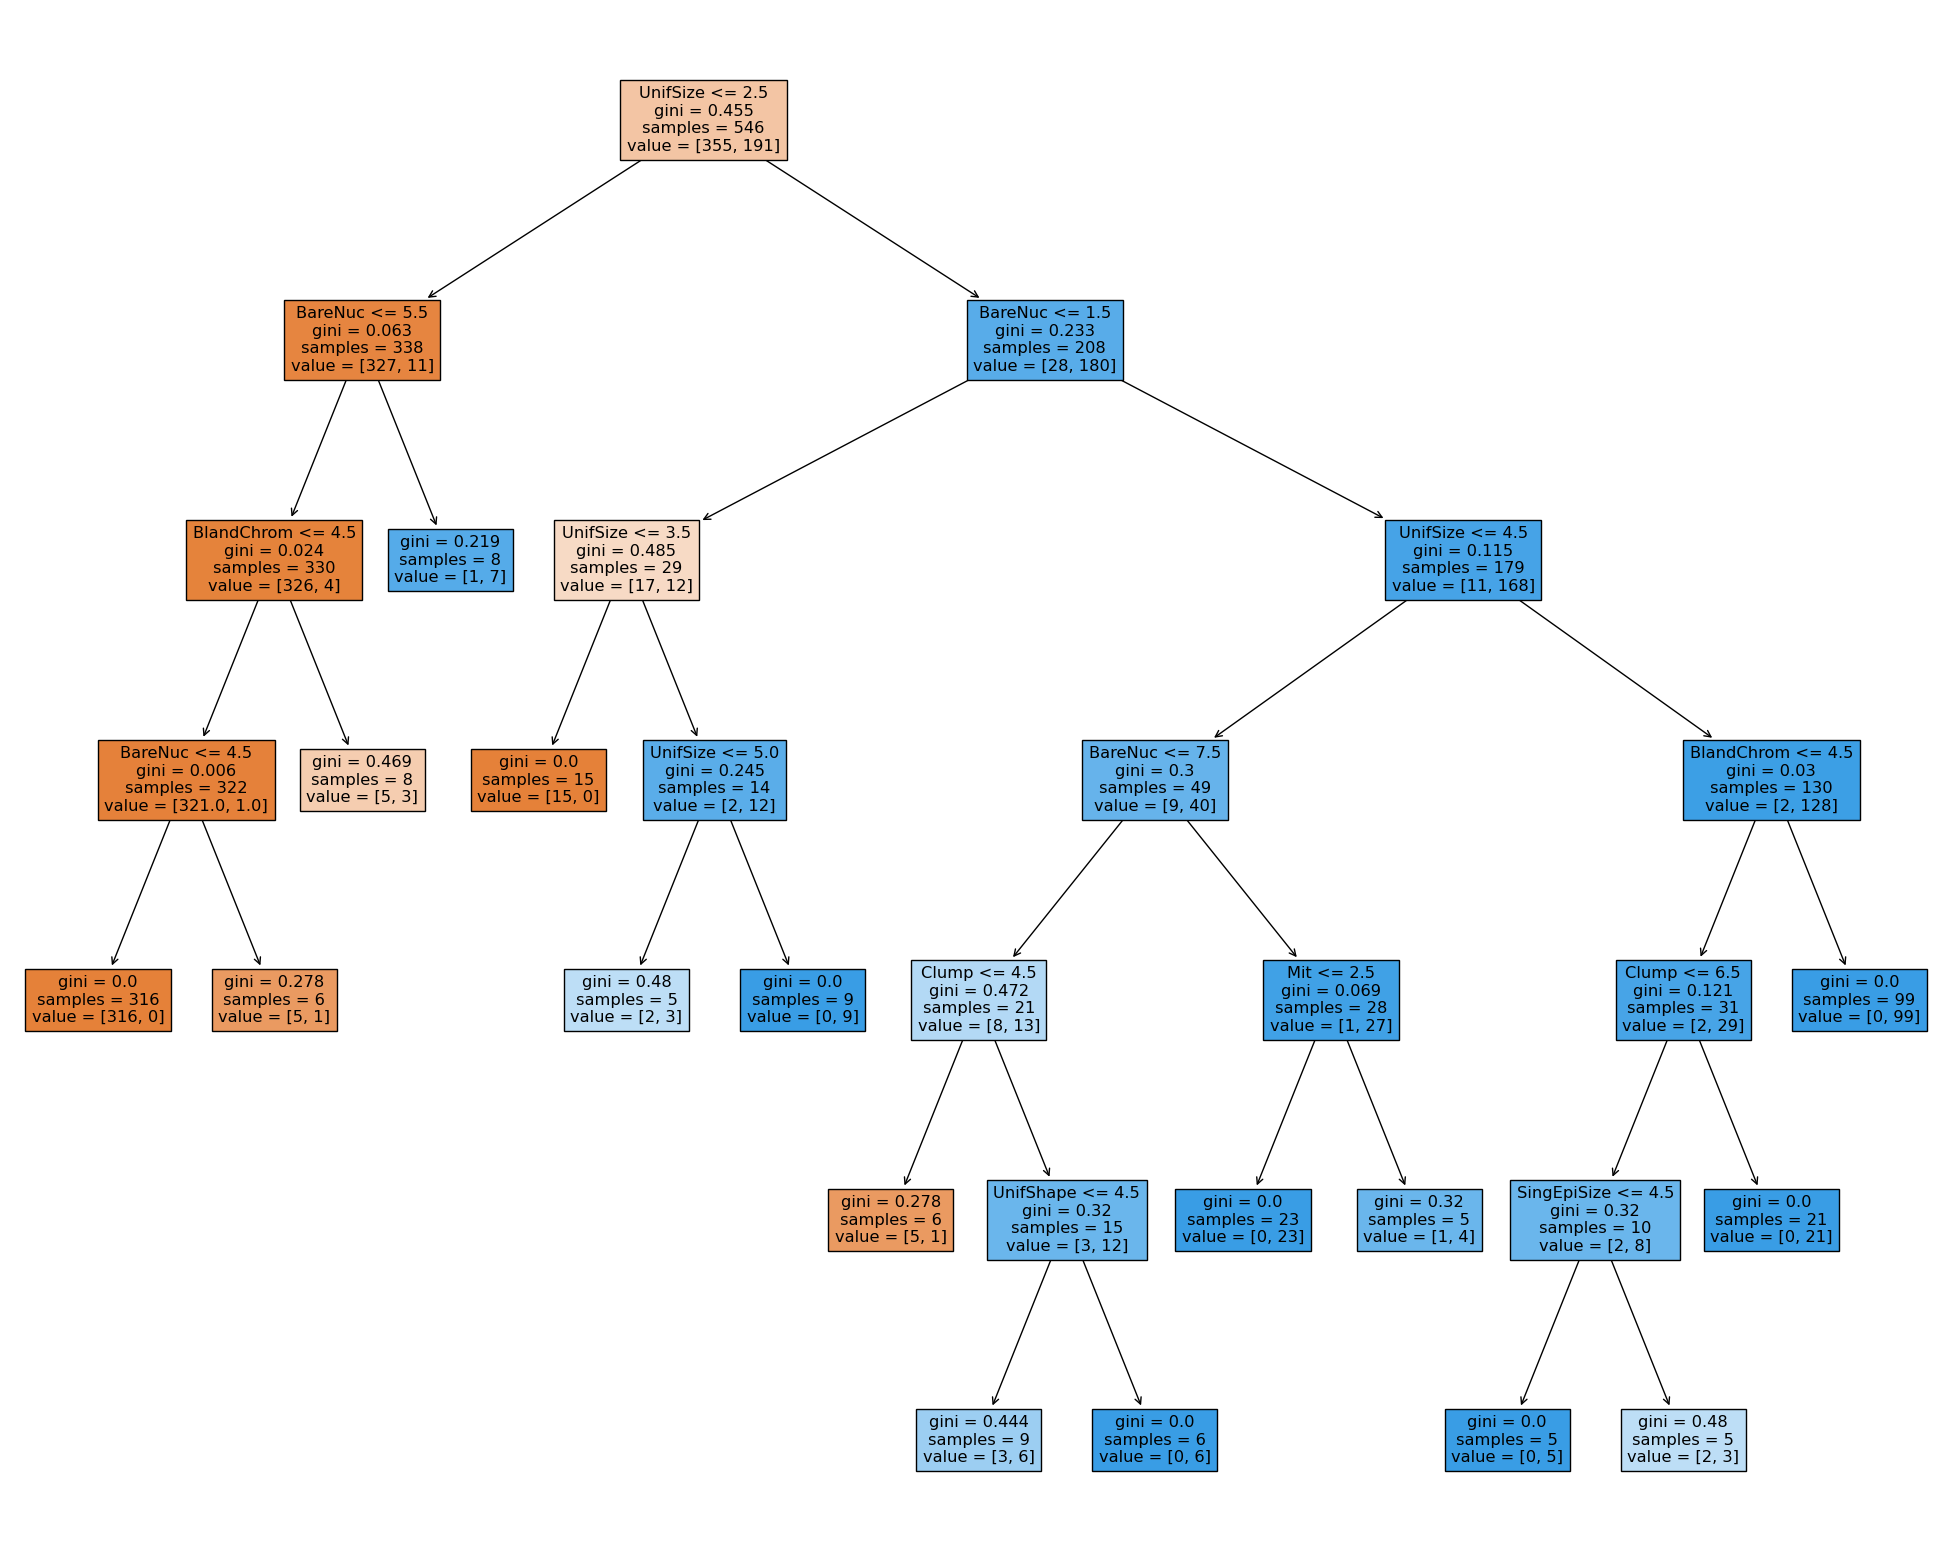

In [26]:
plot_decision_tree(custom_model, feature_names)